# Extended Kalman Filter SLAM

# EKF Algorithm

The extended kalman filter is a recursive state estimation algorithm based on bayes filter. The algorithm can be divided into two steps:
    The algorithm makes the following assumptions:
        1) Motion and Observarion models are linear.
        2) Noise is distributed Normally (Gaussian Distribtion)
        
The algorithm is called 'extended' when it uses first order taylor expansion to perform 'Local Linearization' of motion and observation models which quite often are non-linear(Involvement of angles due to orientation).

Given $x_{1..t}$, the state of the environment at timesteps 1..t, and the commands $u_{1..n}$ executed by the agent(or robot) and $z_{1..n}$ be the Observations made, then the algorithm computes the beleif function `bel` which predicts the present state of the environment.

*Note*: The state variable is modelling the environment, so not only does it consists the variables describing the agent's(or robot's) state but also the variables describing each of the landmark present in the environment. These descriptions of landmarks are generally relative to the robot's state.


\begin{equation*}
bel(x_{t}) = P( z_{t}|x_{t} )\int_{x_{t-1}}P( x_{t} | x_{t-1} , u_{t}) bel(x_{t-1}) dx_{t-1} 
\end{equation*}

The above recursive function can be divided into two steps:
    
    1) Prediction step: Estimating the current state based on previous state and control executed.

\begin{equation*}
    \bar{bel}(x_{t}) = \int_{x_{t-1}}P( x_{t} | x_{t-1} , u_{t}) bel(x_{t-1}) dx_{t-1}
\end{equation*}

    2) Correction step: Correcting the state estimation based on estimations of current observations.
\begin{equation*}
    bel(x_{t}) = P( z_{t}|x_{t} )\bar{bel}(x_{t})
\end{equation*}
    

When The models are not linear, which is often the case:

            if the motion model of the agent can be described as:
    
\begin{equation*}
    x_{t} = g(x_{t-1},u_{t}) + R_{t}
\end{equation*}

            where, g() is a non-linear function and R is noise,
            then on performing linearisation,
\begin{equation*}
    g(x_{t-1},u_{t}) = g(\mu_{t-1},u_{t}) + G_{t}(x_{t-1}-\mu_{t-1})
\end{equation*}
            
   &emsp;&emsp;&emsp;&emsp;&emsp;where $G_{t}$ is the jacobian of g wrt x, and $\mu_{t-1}$ is the
            last best estimate of the state.
            
Similarly,
            
            if the Observation model of the agent can be described as:

\begin{equation*}
    z_{t} = h(x_{t}) + Q_{t}
\end{equation*}
            
            where h() is a non-linear function and Q is noise,
            then on performing linearisation,
\begin{equation*}
    h(x_{t-1}) = h(\bar{\mu_{t}}) + H_{t}(x_{t}-\bar{\mu_{t}})
\end{equation*}

   &emsp;&emsp;&emsp;&emsp;&emsp;where $H_{t}$ is the jacobian of h wrt x and $\bar{\mu_{t}}$ is the
            current best estimate of the state.
            

## Combining Models with Gaussian assumptions we have,

            Prediction step :

\begin{equation*}
P(x_{t} | x_{t-1}, u_{t}) = det(2*\pi*\sum)^\frac{-1}{2} \exp^{\frac{-1}{2}(x_{t}-g(x_{t-1},u_{t})-G_{t}(x_{t-1} - \mu_{t-1}))\sum^{-1}(x_{t}-g(x_{t-1},u_{t})-G_{t}(x_{t-1} - \mu_{t-1}))^{T}}
\end{equation*}

&emsp;&emsp;&emsp;&emsp;&emsp; Where, $\sum$ represents the variance or uncertainity.

&emsp;&emsp;&emsp;&emsp;&emsp; Since we have modelled uncertainity as $R_{t}$ in the motion model,

&emsp;&emsp;&emsp;&emsp;&emsp; $\sum$ can be replaced by $R_{t}$

&emsp;&emsp;&emsp;&emsp;&emsp; So, modified equation is :


\begin{equation*}
P(x_{t} | x_{t-1}, u_{t}) = det(2*\pi*R_{t})^\frac{-1}{2} \exp^{\frac{-1}{2}(x_{t}-g(\mu_{t-1},u_{t})-G_{t}(x_{t-1} - \mu_{t-1}))R_{t}^{-1}(x_{t}-g(\mu_{t-1},u_{t})-G_{t}(x_{t-1} - \mu_{t-1}))^{T}}
\end{equation*}

Similaryly,

&emsp;&emsp;&emsp;&emsp;&emsp; In Observation model the uncertainity or variance is modelled by $Q_{t}$

&emsp;&emsp;&emsp;&emsp;&emsp; So, the equation becomes:

    Correction step :
\begin{equation*}
P(z_{t} | x_{t} )= det(2*\pi*Q_{t})^\frac{-1}{2} \exp^{\frac{-1}{2}(z_{t}-h(\mu_{t})-H_{t}(x_{t} - \mu_{t}))Q_{t}^{-1}(x_{t}-h(\mu_{t})-H_{t}(x_{t} - \mu_{t}))^{T}}
\end{equation*}
    

When the math is simplified, the recursive function `bel`, which is practically the EKF algorithm, boils down to the following pseudocode:

The pseudocode for the EKF Algorithm:

ExtendedKalmanFilter ($\mu_{t-1}, \sum_{t-1}, u_{t}, z_{t})$<br>
        
        (prediction steps)
&emsp;&emsp;&emsp;&emsp;&emsp; $\bar{\mu_{t}} =  g(\mu_{t-1},u_{t})$ <br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\bar{\sum}_{t} = G_{t}\sum_{t-1}$$G_{t}^T~ + R_{t}$

        (corrction steps)
        
&emsp;&emsp;&emsp;&emsp;&emsp; $K_{t} = \bar{\sum}_{t}H_{t}^T(H_{t}\bar{\sum}_{t}H_{t}^T + Q_{t})^{-1}$  (kalman gain)<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\mu_{t} = \bar{\mu}_{t} + K_{t}(z_{t} - h(\bar{\mu}_{t}))$<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\sum_{t} = (I - K_{t}H_{t})\bar{\sum}_{t}$<br><br>

&emsp;&emsp;&emsp;&emsp;&emsp; return($\mu_{t}, \sum_{t}$)

# Implementing the algorithm with data taken from friedburg university's Robotics Mapping course. Thank you for the open access.

## Data files saved from octave. Use octave to read files.

In [1]:
import oct2py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext oct2py.ipython

In [2]:
# creating oct2py core-class instance
oc = oct2py.Oct2Py()
# adding tools directory to path
oc.addpath('octave/tools')
pass

In [3]:
# Reading data
landmarks_data = oc.read_world('data/world.dat')
data = oc.read_data('data/sensor_data.dat')

### As seen above. Landmarks are saved as 3 dimensional objects with dimension corresponding to [id,x,y] respc.

In [4]:
landmark_dict = {'id':np.array(landmarks_data[0]['id']),'x':np.array(landmarks_data[0]['x']),'y':np.array(landmarks_data[0]['y'])}
landmarks = pd.DataFrame(landmark_dict)

In [5]:
landmarks.T

,0,1,2,3,4,5,6,7,8
id,1,2,3,4,5,6,7,8,9
x,2,0,2,9,10,9,5,5,5
y,1,4,7,2,5,8,5,3,9


In [6]:
odometry = data['timestep']['odometry']
sensor = data['timestep']['sensor']

print("Odometry: {}".format(oc.size(odometry)))
print("Sensor: {}".format(oc.size(sensor)))

Odometry: [[   1.  330.]]
Sensor: [[   1.  330.]]


#### The data consists of 330 timesteps with Odometry(motion) and sensor(Observation) data provided for each of the timesteps.

# Odometry Motion Model.

[ x' , y' , Q' ] = [ x , y , Q ] + [ t * cos(Q+r1) , t * sin(Q+r1) , r1 + r2 ]
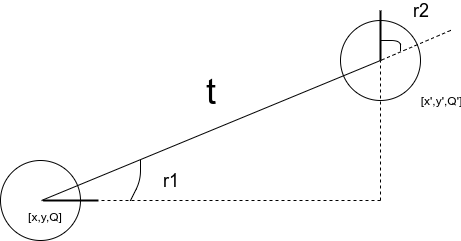

The odometry model captures the motion of the robot. As shown in the above diagram, the odometry model 

In [7]:
print(odometry[0][0])

{'r1': 0.100692392654, 'r2': 0.000171392857486, 't': 0.100072845247}


Odometry data on each timestep consists of parameters 'r1' , 't' and 'r2'.

# Observation Model: Range-Bearing

In [8]:
sensor[0]

Cell([1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x2 StructArray containing the fields:
    id
    range
    bearing,
       1x3 StructArray containing the fields:
    id
    range
    bearing,
       1x3 StructArray containing the fields:
    id
    range
    bearing,
       1x3 StructArray containing the fields:
    id
    range
    bearing,
       1x3 StructArray containing the fields:
    id
    range
    bearing,
       1x3 StructArray containing the fields:
    id
    range
    bearing,
       1x3 St

In [9]:
for i in [0,100]:
    print('\nObservation {} : size: {} \n\t {}'.format(i,oc.size(sensor[0][i][0][:]),np.array(sensor[0][i][0][:])))


Observation 0 : size: [[ 1.  2.]] 
	 [(1.0, 1.89645381418, 0.374031885671) (2.0, 3.85367751107, 1.51951017943)]

Observation 100 : size: [[ 1.  3.]] 
	 [(9.0, 2.80475587919, -0.735588938604) (3.0, 2.23737609054, -2.38224462771)
 (7.0, 4.91207794035, -1.60323893222)]


In [10]:
# Experiment to access individual values
for i in [0,100]:
    print('\nObservation {} : size: {} \n\t ID: {}'.format(i,oc.size(sensor[0][i][0][:]),np.array(sensor[0][i][0][:][1]['id'])))
    print('\t Range: {}'.format(np.array(sensor[0][i][0][:][0]['range'])))
    print('\t Bearing: {}'.format(np.array(sensor[0][i][0][:][0]['bearing'])))
    


Observation 0 : size: [[ 1.  2.]] 
	 ID: 2.0
	 Range: 1.89645381418
	 Bearing: 0.374031885671

Observation 100 : size: [[ 1.  3.]] 
	 ID: 3.0
	 Range: 2.80475587919
	 Bearing: -0.735588938604


The sensor data on exploring reveals that at each time step, the sensor data consists of the Range and Bearing of the observed landmarks. Now at each timestep, the number of landmarks observed can be different, so the size of the sensor data is varying.

The data is of the form : [ ID , Range , Bearing]. Here range is the euclidean distance of the robot from the landmark and bearing is the angle between the robot's pose and the landmark.

Since in our environment state, landmarks must be represented static and not relative to the robot, we will calculate and store landmark positions $(x_{m},y_{m})$ from Range and Bearing information.

Moreover, since we have been given landmark associations already, we assume perfect data associations.

# Variable Declaration:

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; As seen above, EKF assumes that the state of the environment is Normally distributed.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; So the state of each object in the environment can be modelled by <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $~N(\mu_{i},\sum_{i})$ , for $i^th$ object.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Where $\mu_{i}$ is a vector of size <b>m+bn</b>, where m is the parameters used to model robot's state<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; and b is the number of parameters used to model a landmark's state<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; and n is the number of landmarks.

Similarly, $\sum_{i}$ is a covariance matrix of size <b>(m+bn $*$ m+bn)</b> .


## Initialisation:

To compute the recursive posterior belief recursively, it is required for the algorithm to have an intial belief bel($x_{0}$. This serves as a boundary condition for the algorithm.

The initial value of the belief depends on how certain we are about the inital conditions of the environment. If we are absolutely certain about the initial belief, the state can be initialised as a point mass distribution centred at the true value of $x_{0}$. For a gaussian distribution this may be a gaussian centred at the true value with an infinite height.

However, when this is not the case, and if we are absolutely uncertain or ignorant of the environments initial state, then the $x_{0}$ can be initialised as a uniform distribution. In case of a gaussian distribution, this can be represented by $\sigma -> \inf$

In [11]:
# Given the motion model above, we have 3 robot parameters and 9*2 landmark parameters(x,y).(9*3 including the ID)
# But we won't include id in the covariance matrix instead use it to index through the matrix.
m = 3    # Number of motion parameters
n = 9    # Number of landmarks
b = 2    # Number of parameters for each landmark.
INF = 1000 # infinite value.

global observedLandmakrs # Since we need to change it inside a function
observedLandmarks = np.zeros(n) # recording if a landmark has been observed or not.

# We create the covariance matrix by dividing into 4 matrices:
#   sigma_mm :representing the covaraince of robot params with themselves: (m,m)
#   sigma_mn :representing the covariance of robot params with landmarks : (m,bn)
#   sigma_nm :representing the covariance of landmarks with robot params : (bn,m)
#   sigma_nn :representing the covariance of landmarks with landmarks : (bn,bn)

sigma_mm = np.zeros((m,m)) # absolutely certain that robot is at (0,0,0)
sigma_mn = np.zeros((m,b*n)) # No correlations. Haven't seen a landmark yet.
sigma_nm = np.zeros((b*n,m)) # No correlations. Haven't seen a landmark yet.
sigma_nn = INF*np.eye(b*n) # Landmarks Uniformly distributed.

sigma = np.r_[np.c_[sigma_mm,sigma_mn],np.c_[sigma_nm,sigma_nn]]
mu = np.zeros(m+b*n)

## Proceeding with the Prediction step of the algorithm.

Remember,

&emsp;&emsp;&emsp;&emsp;&emsp; $\bar{\mu}_{t} = g(\mu_{t-1},u_{t})$
&emsp;&emsp;&emsp;&emsp;&emsp; $\bar{\sum}_{t} = G_{t}\sum_{t-1}G_{t}^T + R_{t}$
&emsp;&emsp;&emsp;&emsp;&emsp; $G_{t} = Jacobian of g()$

In [12]:
# Function to normalize orientation angle
def normalize_angle(theta):
    return oc.normalize_angle(theta)

# implementing the function g or the motion model described a few slides above:
def g(mu,r1,r2,t):
    # The odometry model will only effect the motion parameters. This means that landmark parameters
    # will remain unchanged. This will only update the sigma_mm matrix.
    
    # updating parameters.
    mu[0] = mu[0] + t*np.cos(mu[2]+r1)    # x' = x + Dcos(Q+q1)
    mu[1] = mu[1] + t*np.sin(mu[2]+r1)    # y' = y + Dsin(Q+q1)
    mu[2] = normalize_angle(mu[2] + r1 + r2)               # Q' = Q + r1 + r2
    
    return mu

# implementing a function that computes the jacobian of g


def G(mu,r1,r2,t):
    # Jacobian matrix will be a mxm matrix. To obtain it we just have to compute the differential of g()
    # wrt to all paramters(x , y, q, here)
    G = np.eye(m)
    G[0,2] = -t*np.sin(mu[2] + r1)
    G[1,2] = t*np.cos(mu[2] + r1)
    
    return G

# Defining Odometry Noise as :

R = [0.1,0.1,0.01]*np.eye(m)   

In [13]:
# Implementing the Prediction step of the algorithm
def prediction(mu,sigma,odometry):
    # The odometry model will only effect the motion parameters. This means that landmark parameters
    # will remain unchanged. This will only update the sigma_mm matrix.
    r1 = odometry['r1']
    r2 = odometry['r2']
    t = odometry['t']
    
    # Calculating Jacobian
    G_jg = G(mu,r1,r2,t)    # Jacobian of g
    
    # Updating mu and sigma
    mu = g(mu,r1,r2,t)
    
    sigma[0:m,0:m] = np.matmul(np.matmul(G_jg.T,sigma[0:m,0:m]),G_jg)
    sigma[0:m,0:m] = sigma[0:m,0:m] + R
    
    return mu, sigma

# Implementing the Correction step

Remember,

&emsp;&emsp;&emsp;&emsp;&emsp; $K_{t} = \bar{\sum}_{t}H_{t}^T(H_{t}\bar{\sum}_{t}H_{t}^T + Q_{t})^{-1}$  (kalman gain)<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\mu_{t} = \bar{\mu}_{t} + K_{t}(z_{t} - h(\bar{\mu}_{t}))$<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\sum_{t} = (I - K_{t}H_{t})\bar{\sum}_{t}$<br><br>
Where, h(x) is the observation model and Ht is it's jacobian

The function h(x) returns the estimate of a landmark position in terms of distance 'q' called range and orientation difference (atan2(del(y),del(x)) - theta) where del(y) and del(x) are the difference in coordinates and theta is the orientations of the robot.

So if, $(x_{l},y_{l})$ is the coordinate of landmark and $(x,y,\theta)$ is the pose of the robot then,

\begin{equation*}
    \delta_{x} = x_{l} - x
\end{equation*}
\begin{equation*}
    \delta_{y} = y_{l} - y
\end{equation*}
\begin{equation*}
\delta = \begin{bmatrix}
                \delta_{x} \\
                \delta_{y} 
             \end{bmatrix}
\end{equation*}

\begin{equation*}
q  = \delta\delta^T    (Euclidean Distance)^2
\end{equation*}

\begin{equation*}
\DeclareMathOperator{\taninv}{tan^{-1}}
h(x) = \begin{bmatrix}
        \sqrt{q} \\
        \taninv{\frac{\delta_{y}}{\delta_{x}}} + \theta
       \end{bmatrix}
\end{equation*}

In [14]:
# Function to calculate landmark coordinates from observed data(sensed).
def calculateObservedLocation((x,y,phi),(r,bearing)):
    return [x + r*np.cos(bearing + phi), y + r*np.sin(bearing + phi)]

# Function to estimate range bearing from state.
def calculateEstimatedLocation((x,y,phi),(xl,yl)):
    delta_x = xl-x
    delta_y = yl-y
    delta = [delta_x, delta_y]
    r = np.sqrt(np.dot(delta,delta))
    bearing = np.arctan2(delta_y,delta_x) - phi
    return [r,bearing]

# Function to estimate the landmark coordinates from current estimated state.
# This is the function h modelling P(z|x), Use the variables in Xt to estimate the
# landmark positions.

# The positions of landmark n is set at 2n+3, 2n+4, corresponding to x and y coordinate
# of the landmark.


# Returns a matrix of size (1 x nb). with unobserved landmarks indices having zero.
def h(mu, sensor,observedLandmarks):
    x_r, y_r, theta_r = mu[0],mu[1],mu[2]    # Robot's state.( coordinates, orientation)
    z = np.zeros((n,b))
    # for every sensed landmark, output an estimate.
    for i in sensor:
        index = int(i['id']) - 1
        r = i['range']
        bearing = i['bearing']
        # If observing a landmark for the first time, estimate = observation.
        # calculate and update the landmark coordinates in system.
        if not(observedLandmarks[index]):
            z[index] = [r, bearing]
            # updating landmark location
            [mu[2*index + 3] ,mu[2*index + 4]] = calculateObservedLocation((x_r,y_r,theta_r),(r,bearing))
            observedLandmarks[index] = True                           # Marking landmark as observed.
    
        # If landmark observed before, estimate the landmark's range and bearing from current state
        else:
            x_l, y_l = mu[2*index+3], mu[2*index+4]
            z[index] = calculateEstimatedLocation((x_r,y_r,theta_r),(x_l,y_l))
            
    return mu, observedLandmarks, z.ravel()

### Calculatin Jacobian of h(x)

Now we know that $h(x)$ outputs the relative position of each landmark in the form of a range-bearing pair.
The jacobian of such a function with respect to $x_{t}$ for a single estimation will be of size $(b,bn+m)$ or $(2,21)$ in this case. However, since the estimate($h(x)$) only depends on $(x,y,\theta)$ (robot's pose) and $(x_{l},y_{l}$ (landmark's coordinates) this will be a sparse matrix.

In our function, we will stack the Jacobians of each landmark together to form a single matrix of size $(bn,m+bn)$ or $(18,21)$.

Now that we have $h(x)$ and our concepts clear, we can differentiate the function $h(x)$ wrt to all the depend variables $(x,y,\theta,x_{l},y_{l})$.

So for a landmark i, we have Jacobian $H_{t}^{i}$ as:

\begin{equation*}
    H_{t}^{i} = \frac{1}{q}\begin{bmatrix}
                 -\sqrt{q}\delta_{x} && -\sqrt{q}\delta_{y} && 0 && \sqrt{q}\delta_{x} && \sqrt{q}\delta_{y} \\
                 \delta_{y} && -\delta_{x} && -q && -\delta{y} && \delta_{x}
                 \end{bmatrix}
\end{equation*}

Note, Since we will compute the jacobian wrt to vector $x_{t}$ (mean), the above matrix will be of size $b \times (m +bn)$ or $2 \times 21$ in this case.

Since the estimation of a landmark only depends upon the robot's pose and landmark's coordinates.This would be a sparse matrix. With values NOT corresponding to the depend values being zero.

In practise, we will stack such Jacobian on to one another for each landmark giving a $18 \times 21$ matrix.

In [15]:
# function to compute the Jacobian Matrix(Ht) of function h.
def H(mu,sensor):
    # This function computes the jacobian of the estimate function h wrt all state variables.
    # Since each estimate has a size (1xb), and we will compute the jacobian for each observation,
    # the size of the jacobian will be (bn x m+bn).
    # Since observed landmarks < total landmarks usually, this will be a sparse matrix.
    H = np.zeros((b*n,m+b*n))
    xr, yr, theta_r = mu[0],mu[1],mu[2]    # robot's pose variables.
    for i in sensor:
        index = int(i['id']) - 1
        xl, yl = mu[2*index+3], mu[2*index+4] # Landmark's coordinates.
        delta_x = xl - xr                      # Difference in x $delta_x$
        delta_y = yl - yr                     # Difference in y $delta_y$
        delta = [delta_x, delta_y]            # Matrix containing differences
        q = np.dot(delta,delta)               # euclidean distance square (delta_x^2 + delta_y^2)
        q_sq = np.sqrt(q)                     # euclidean distance
        
        H[index*2][0:m] = [-q_sq*delta_x, -q_sq*delta_y, 0]/q        
        H[index*2+1][0:m] = [delta_y, -delta_x, -q]/q
        H[index*2][3+2*index:3+2*index+2] = [q_sq*delta_x, q_sq*delta_y]/q
        H[index*2+1][3+2*index:3+2*index+2] = [-delta_y, delta_x]/q
        
    return H

In [16]:
# Creating Sensor Noise Qt
Q = 0.01*np.eye(b*n)

# Creating function to convert sensor data into (1x18) matrix to aid processing.
def process_data(sensor):
    processed_data = np.zeros((n,b))
    for i in sensor:
        processed_data[(int(i['id']) - 1)] = [i['range'],i['bearing']]
    return processed_data.ravel()

# Implementing the correction step. Implementing the pseudo codes mentioned above.
def correction(mu,sigma,sensor,observedLandmarks):
    
    # applying preprocessing to data
    z = process_data(sensor)
    mu, observedLandmarks, z_bar = h(mu,sensor,observedLandmarks)
    
    # Calculating Jacobian and finding inverse : (H*sigma*H^T + Q)^-1
    H_jh = H(mu,sensor)
    inv = np.linalg.inv(np.matmul(np.matmul(H_jh,sigma),H_jh.T) + Q)
    
    # calculating kalman mean
    K = np.matmul(np.matmul(sigma,H_jh.T),inv)      # Kalman Gain
    
    # calculate difference in observation and estimate
    diff = z - z_bar
       
    # using helper function provided to normalize all bearings to (-pi,pi)
    difference = oc.normalize_all_bearings(diff).ravel()    

    # update mu and sigma
    mu = mu + np.matmul(K,difference)
    sigma = np.matmul((np.eye(m+b*n) - np.matmul(K,H_jh)),sigma)
    
    return mu, sigma

# Final Algorithm 

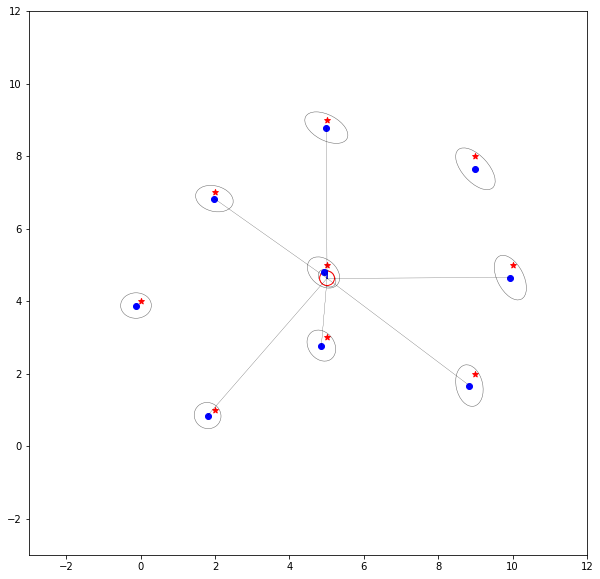

In [18]:
from plotting_tools.plotter import plot_and_save_state

# Resetting Values
sigma = np.r_[np.c_[sigma_mm,sigma_mn],np.c_[sigma_nm,sigma_nn]]
mu = np.zeros(m+b*n)
observedLandmarks = np.zeros(n)

# Implementing the EKF Algorithm
fig = plt.figure(figsize=(10,10))
for i in xrange(330): #each timestep
    sensed_data = sensor[0][i][0][:]
    
    mu , sigma = prediction(mu,sigma,odometry[0][i])
    mu, sigma = correction(mu,sigma,sensed_data,observedLandmarks)
    
    plot_and_save_state(mu,sigma,observedLandmarks,landmarks,sensed_data['id'],i)

In [19]:
import os
# Adding "echo 'y' |" sends and 'y' to the program if it asks permission
# to overwrite the video file if it already exists

program = 'echo "y" | ffmpeg -r 10  -i plots/ekf_%03d.png -b 500000 plots/ekf_slam.mp4'
success = os.system(program)
if(success != 0):
    print('''An error Occured. Please check if you have ffmpeg installed.\nTo install ffmpeg on Ubuntu : execute `sudo apt-get install ffmpeg` in shell. For other OS, follow this link : https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg''')

In [20]:
%%HTML
<video width="800" height="800" controls autoplay>
  <source src="plots/ekf_slam.mp4" type="video/mp4">
</video>

# References

The references folder has some good material on the SLAM problem generally.

The dataset used here has been taken from Freiburg University's Robotics Mapping Course Page.

http://ais.informatik.uni-freiburg.de/teaching/ws13/mapping/

The lectures for this page can be found on youtube.

https://www.youtube.com/watch?v=U6vr3iNrwRA&list=PLgnQpQtFTOGQrZ4O5QzbIHgl3b1JHimN_

Further, if interested in how to draw the iso-contours(probability ellipse) when dealing with Bivariate Gaussian Distribution, check the references for a guide and also check the code in plotting_tools folder.